In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df = pd.read_csv("../content/Bankniftydata.csv", index_col='Date', parse_dates=['Date'])
#nifty_bank_df = pd.read_csv("../input/nifty-indices-dataset/NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])

df.head(5)

,Open,High,Low,Close,(High-Low),(Open-Close)
Date,,,,,,
2016-01-01,16932.50,17067.45,16824.05,17039.25,243.4,-106.75
2016-01-04,16966.35,16966.35,16575.45,16599.15,390.9,367.2
2016-01-05,16652.05,16670.20,16474.85,16542.50,195.35,109.55
2016-01-06,16505.45,16614.95,16377.65,16433.15,237.3,72.3
2016-01-07,16256.55,16256.55,16049.75,16073.85,206.8,182.7


In [ ]:
df.tail(5)

,Open,High,Low,Close,(High-Low),(Open-Close)
Date,,,,,,
2021-07-05,35010.95,35234.30,34926.40,35212.00,307.9,-201.05
2021-07-06,35173.60,35807.45,35165.55,35579.15,641.9,-405.55
2021-07-07,35550.60,35795.75,35427.65,35771.30,368.1,-220.7
2021-07-08,35603.25,35811.00,35134.65,35274.10,676.35,329.15
2021-07-09,35163.75,35225.20,34859.90,35071.95,365.3,91.8


In [ ]:
def plot_attribute(df, attritube ,start='2016', end='2021',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Bank Nifty stock {} from 2016 to 2021".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')

    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

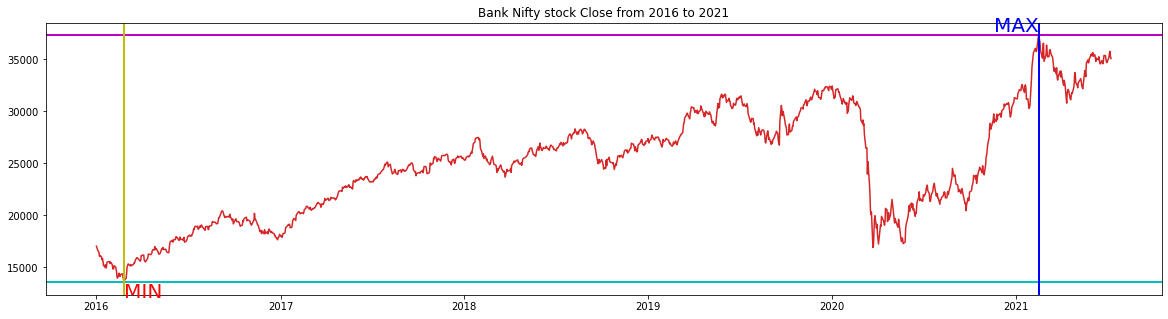

Max Value :   37306.25
Min Value :   13555.7


In [ ]:
plot_attribute(df,"Close",color='red')

In [ ]:
dicky_fuller_result = adfuller(df['Close'])
dicky_fuller_result

(-1.46144768192381,
 0.5524891826577587,
 7,
 1358,
 {'1%': -3.4351745242248715,
  '10%': -2.567904365598721,
  '5%': -2.8636706623947417},
 19736.560894214304)

0th element is test statistic (-1.46144768192381)

More negative means more likely to be stationary

1st element is p-value: (0.5524891826577587)

1. If p-value is small then 0.05→reject null hypothesis. Reject non-stationary.
2. which is more than 0.05 null hypothesis is True and this is a random walk.

4th element is the criticaltest statistics

In [ ]:
#plot_attribute(#df.diff(),"Close",color='red')

Window functions
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.
Rolling - Same size and sliding
Expanding - Contains all prior values

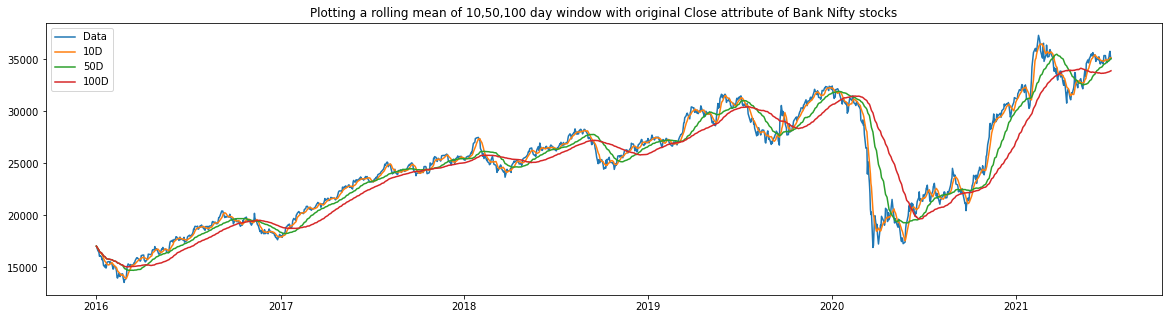

In [ ]:
some_part_of_data = df['2016':'2021']

rolling_df_10 = some_part_of_data['Close'].rolling('10D').mean()
rolling_df_50 = some_part_of_data['Close'].rolling('50D').mean()
rolling_df_100 = some_part_of_data['Close'].rolling('100D').mean()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(some_part_of_data.index,some_part_of_data['Close'])
ax.plot(rolling_df_10.index, rolling_df_10)
ax.plot(rolling_df_50.index, rolling_df_50)
ax.plot(rolling_df_100.index, rolling_df_100)
ax.set_title("Plotting a rolling mean of 10,50,100 day window with original Close attribute of Bank Nifty stocks")
plt.legend(['Data','10D','50D','100D'])
plt.show()

In [ ]:
# Obtain data from the data frame
OHLC_data = df['6-2020':'2020']

fig = go.Figure(data=go.Ohlc(x=OHLC_data.index,
                            open=OHLC_data['Open'],
                            high=OHLC_data['High'],
                            low=OHLC_data['Low'],
                            close=OHLC_data['Close']))

fig.update_layout(title_text='Bank Nifty Index From June 2020 to July 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

In [ ]:
Candlestick_data = df['3-2020':'2020']

fig = go.Figure(data=go.Candlestick(x=Candlestick_data.index,
                            open=Candlestick_data['Open'],
                            high=Candlestick_data['High'],
                            low=Candlestick_data['Low'],
                            close=Candlestick_data['Close']))

fig.update_layout(title_text='Bank Nifty Index From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

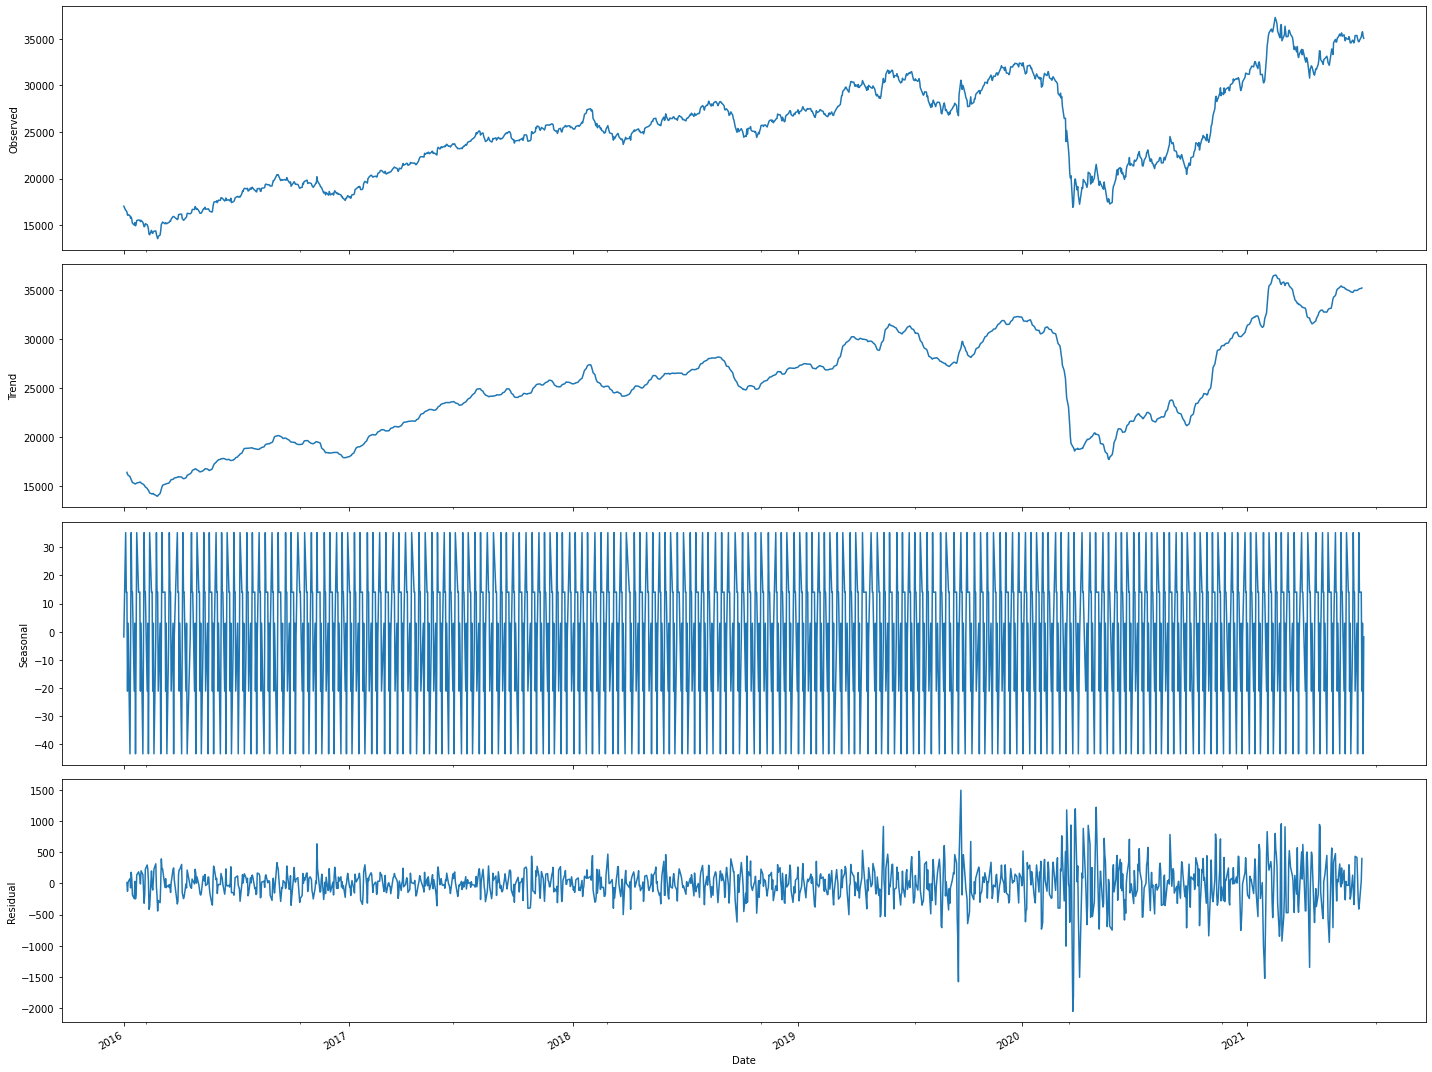

In [ ]:
decomposition_data = df['2016':'2021']
decomp_results = seasonal_decompose(decomposition_data['Close'], freq=7)
plt.rcParams["figure.figsize"] = (20,15)
figure = decomp_results.plot()

plt.show()


* There is an upward trend at first after there is downward trend.
* Also, we can see there is uniform seasonal change
* Non-uniform noise that represent outliers










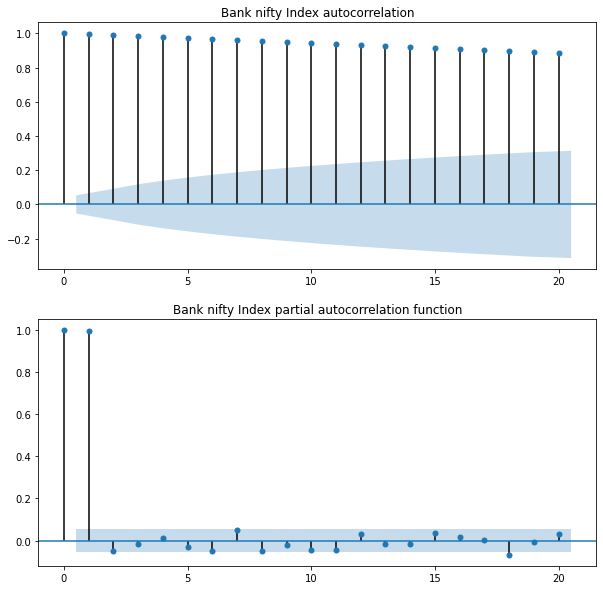

In [ ]:
plt.figure(figsize=(10,10))

# ACF of BAnk Nifty Index close price
ax1 = plt.subplot(211)
plot_acf(df["Close"], lags="20",title="Bank nifty Index autocorrelation",ax=ax1)

# PACF of Bank Nifty Index close price
ax2 = plt.subplot(212)
plot_pacf(df["Close"], lags="20",title="Bank nifty Index partial autocorrelation function",ax=ax2)

plt.show()

In [ ]:
train_data = df["Close"]["2016":"4-15-2020"]
test_data =  df["Close"]["4-15-2020":]

In [ ]:
order_aic_bic =[] 
# Loop over AR order 
for p in range(6): 
    # Loop over MA order 
    for q in range(3): 
        # Fit model 
        for d in range(2):
            model1 = SARIMAX(train_data, order=(p,d,q)) 
            results = model1.fit() 
            # Add order and scores to list 
            order_aic_bic.append((p,d, q, results.aic, results.bic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

In [ ]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])
#short value by aic and get value of p d q
order_df.sort_values('aic')[:5]

,p,d,q,aic,bic
28,4,0,2,15206.459247,15241.194951
34,5,0,2,15207.772116,15247.470064
33,5,1,1,15209.804857,15244.533929
35,5,1,2,15210.748590,15250.438959
31,5,1,0,15217.563759,15247.331535


AIC(Akaike information criterion) And BIC (Bayesian information criterion)

AIC
Lower AIC indicate batter model
AIC choose simple models with lower order

BIC
Lower BIC indicate batter model
BIC favoures simple model then AIC
AIC is better at choosing predictive models
BIC is better at choosing good explanatory model

In [ ]:
order_aic_bic =[] 
# Loop over AR order 
for p in range(6): 
    # Loop over MA order 
    for q in range(3): 
        # Fit model 
        for d in range(2):
            model2 = SARIMAX(test_data, order=(p,d,q)) 
            results = model2.fit() 
            # Add order and scores to list 
            order_aic_bic.append((p,d, q, results.aic, results.bic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

In [ ]:
model1 = SARIMAX(train_data, order=(2,1,2)) 
results1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
mae = np.mean(np.abs(results1.resid))
print(mae)

227.39852339298773


In [ ]:
mode2 = SARIMAX(test_data, order=(2,1,2)) 
results2 = mode2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
mae = np.mean(np.abs(results.resid))
print(mae)

445.02665520725753


In [ ]:
import numpy as np 

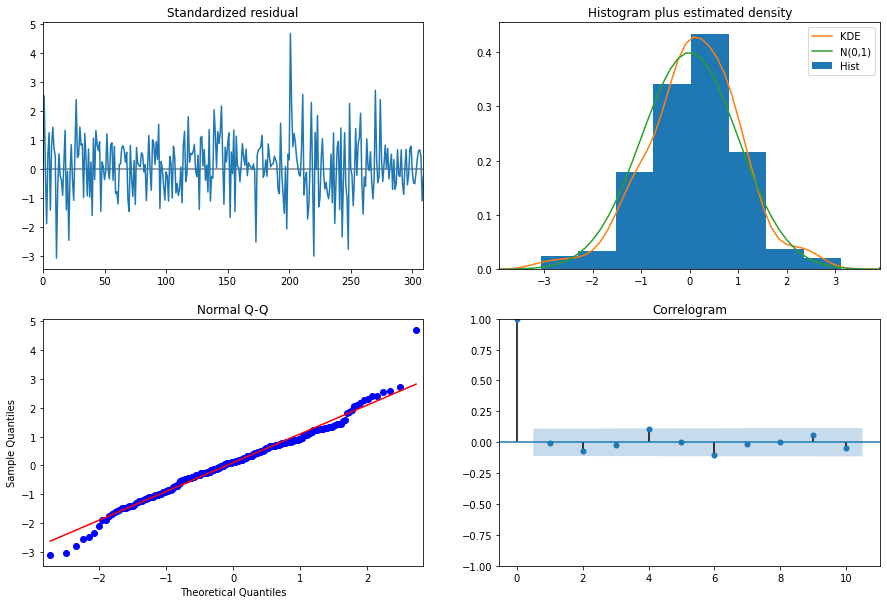

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics() 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [28896.618248175182]
predictions = [28861.852]
mse = mean_squared_error(expected, predictions)

rmse = sqrt(mse)
print('RMSE:%f' %rmse)

In [ ]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

In [ ]:
forecast = results1.get_forecast(steps=len(test_data))

In [ ]:
forecast

In [ ]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

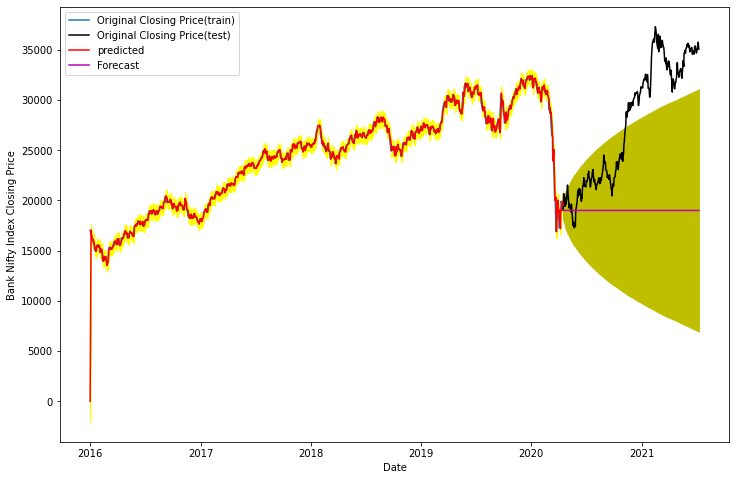

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Bank Nifty Index Closing Price')
plt.legend()
plt.show()